In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats,lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
# Create an empty list to hold the weather data.
city_data = []

#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | togur
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | avera
Processing Record 12 of Set 1 | vreed en hoop
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | cagliliog
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | k

Processing Record 41 of Set 4 | fairhope
Processing Record 42 of Set 4 | noumea
Processing Record 43 of Set 4 | finnsnes
Processing Record 44 of Set 4 | csenger
Processing Record 45 of Set 4 | santa fe
Processing Record 46 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 4 | malinovoye ozero
Processing Record 48 of Set 4 | erzin
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | halifax
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | nampula
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | kharovsk
Processing Record 6 of Set 5 | sao jose da coroa grande
Processing Record 7 of Set 5 | margate
Processing Record 8 of Set 5 | sinnamary
Processing Record 9 of Set 5 | shache
Processing Record 10 of Set 5 | pahrump
Processing Record 11 of Set 5 | cardston
Processing Record 12 of Set 5 | cap malheureux
Processing Record 13 of Set 5 | sakakah
Processing Record 

Processing Record 32 of Set 8 | chibuto
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 8 | mandalgovi
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | chabahar
Processing Record 38 of Set 8 | remedios
Processing Record 39 of Set 8 | calvinia
Processing Record 40 of Set 8 | columbia
Processing Record 41 of Set 8 | bongandanga
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | waterfoot
Processing Record 44 of Set 8 | yerbogachen
Processing Record 45 of Set 8 | mingshui
Processing Record 46 of Set 8 | qaqortoq
Processing Record 47 of Set 8 | sungaipenuh
Processing Record 48 of Set 8 | mitsamiouli
Processing Record 49 of Set 8 | dzhebariki-khaya
Processing Record 50 of Set 8 | may pen
Processing Record 1 of Set 9 | topolobampo
Processing Record 2 of Set 9 | boden
Processing Record 3 of Set 9 | yibin
Processing Record 4 of Set 9 | mahebourg
Processing Rec

Processing Record 21 of Set 12 | kjollefjord
Processing Record 22 of Set 12 | teya
Processing Record 23 of Set 12 | noyabrsk
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 26 of Set 12 | jiwani
Processing Record 27 of Set 12 | la asuncion
Processing Record 28 of Set 12 | tyup
Processing Record 29 of Set 12 | tual
Processing Record 30 of Set 12 | batagay
Processing Record 31 of Set 12 | umm lajj
Processing Record 32 of Set 12 | terney
Processing Record 33 of Set 12 | dindori
Processing Record 34 of Set 12 | mingguang
Processing Record 35 of Set 12 | santiago chimaltenango
Processing Record 36 of Set 12 | pyapon
Processing Record 37 of Set 12 | namatanai
Processing Record 38 of Set 12 | marienburg
Processing Record 39 of Set 12 | buin
Processing Record 40 of Set 12 | srednekolymsk
Processing Record 41 of Set 12 | nara
Processing Record 42 of Set 12 | paveh
Processing Record 43 of Set 12 | kon tum
Proces

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Togur,RU,2021-07-18 21:02:44,58.3631,82.8265,50.34,95,26,5.61
1,Rikitea,PF,2021-07-18 21:02:44,-23.1203,-134.9692,71.65,61,100,25.68
2,San Patricio,US,2021-07-18 21:00:51,28.0170,-97.5169,93.92,50,12,12.21
3,Punta Arenas,CL,2021-07-18 20:58:39,-53.1500,-70.9167,44.71,81,40,13.80
4,Mataura,NZ,2021-07-18 20:58:43,-46.1927,168.8643,41.70,97,94,1.97
5,Leningradskiy,RU,2021-07-18 20:59:24,69.3833,178.4167,34.66,99,100,4.88
6,Kapaa,US,2021-07-18 20:58:46,22.0752,-159.3190,84.18,82,45,4.00
7,Bethel,US,2021-07-18 21:02:45,41.3712,-73.4140,83.68,78,61,1.99
8,Airai,TL,2021-07-18 20:59:35,-8.9266,125.4092,56.19,70,99,3.38
9,Avera,US,2021-07-18 20:58:40,33.1940,-82.5271,90.72,43,100,8.79


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

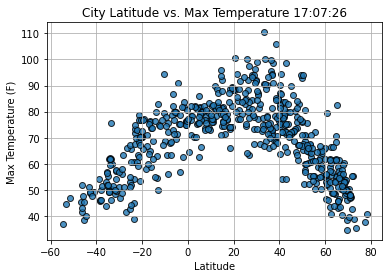

In [10]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%X"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

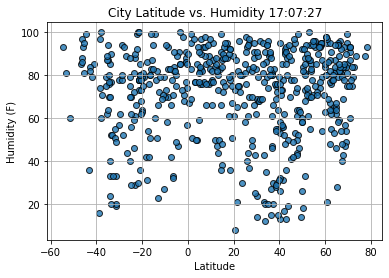

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%X"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

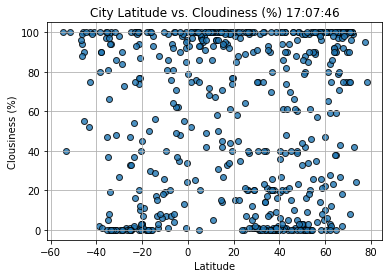

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%X"))
plt.ylabel("Clousiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

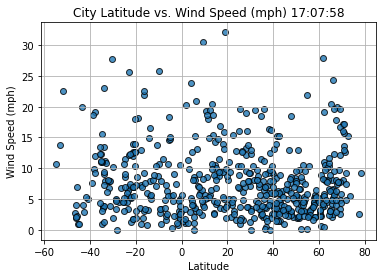

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) " + time.strftime("%X"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()